In [26]:
#https://www.kaggle.com/liujiaqi/hr-comma-sepcsv/kernels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

train_on_gpu = torch.cuda.is_available()
if train_on_gpu:
    print("Training on GPU")
else:
    print("Training on CPU")

Training on GPU


In [27]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### 1.- Renombrar los nombres de las columnas

In [28]:
df = df.rename(columns = {
    "satisfaction_level" : "satisfaction",
    "last_evaluation" : "evaluation",
    "number_project": "projectCount",
    "average_montly_hours": "averageMonthlyHours",
    "time_spend_company": "yearsAtCompany",
    "Work_accident": "workAccident",
    "promotion_last_5years": "promotion",
    "sales" : "department",
    "left" : "turnover"
})

In [29]:
df.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### 2.- Conocer el ratio de personas que se han ido y los que quedan

In [30]:
#move turnover to the beginning
front = df["turnover"]
df.drop(labels = ["turnover"], axis = 1, inplace = True)
df.insert(0, "turnover", front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [31]:
num_rows = df.shape[0]
turnover_rate = df["turnover"].value_counts()/num_rows
print(turnover_rate)

0    0.761917
1    0.238083
Name: turnover, dtype: float64


In [32]:
turnover_summary = df.groupby("turnover")
turnover_summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


### 3.- Renombrar los nombres de los departamentos

In [33]:
df['department'].replace(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
        'IT', 'product_mng', 'marketing', 'RandD'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], inplace = True)
df['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace = True)

In [23]:
df.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


### 4.- Generar el mapa de calor

In [24]:
#!conda install -c anaconda seaborn -y

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,-0.043814,-0.157898
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,0.015413,0.050022
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.011855,-0.013002
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.005577,-0.001803
averageMonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,-0.002387,-0.002242
yearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,-0.001611,0.048715
workAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,0.019215,0.009247
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,0.015170,0.098119
department,-0.043814,0.015413,0.011855,0.005577,-0.002387,-0.001611,0.019215,0.015170,1.000000,0.033415
salary,-0.157898,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,0.098119,0.033415,1.000000


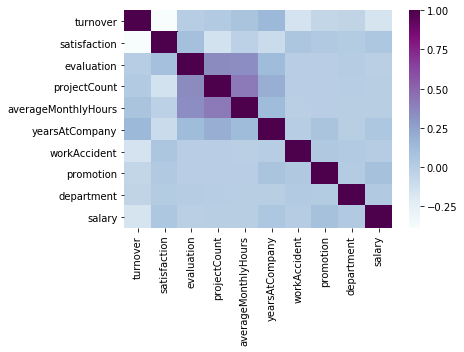

In [34]:
import seaborn as sns
corr = df.corr()
corr = (corr)
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='BuPu')
corr

1: Dejó Belatrix

0: Continua en Belatrix

Variables independenties que pueden ser D.P o I.V a la rotacion.

1.- Nivel de Satisfacción

2.- Ultima Evaluación de Desempeño

3.- Número de proyectos en Belatrix

4.- Promedio de Horas trabajadas por mes

5.- Años trabajando en la compañia

6.- Accidentes de Trabajo (Binario Sí/No)

7.- Promoción en los últimos 5 años (Binario (Sí/No))

8.- Departamento (Ventas, Tecnica, soporte, management, etc.)

9.- Salario (Puede ser categorico: Minimo, Medio, Alto)

### 5.- Diagramas

In [39]:
print(df["averageMonthlyHours"].max())
print(df["averageMonthlyHours"].min())

print(df["projectCount"].max())
print(df["projectCount"].min())

310
96
7
2


 ### hist2d
 
 Given a ser of ordered pairs describing data points, you can count the number of points
 with similar values to construct a *two dimensional* histogram. This is similar to a one
 dimensional histogram, but it describes the joint variation of two random variables rather
 than just one.

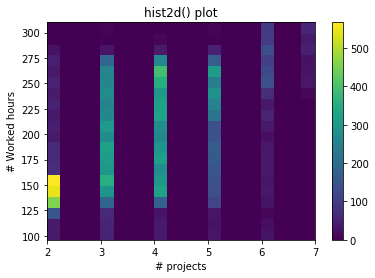

In [43]:
plt.hist2d(df["projectCount"], df["averageMonthlyHours"], bins=(20,20), range=((2,7), (96,310)))
plt.colorbar()
plt.xlabel("# projects")
plt.ylabel("# Worked hours")
plt.title("hist2d() plot")
plt.show()

### 5.- Logistic Regression - Training data

a) Take your data

b) Pick a random model

c) Calculate the error

d) Minimize the error, and obtain a better model

e) Enjoy!!

In [11]:
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [12]:
df.turnover = df.turnover.astype(int)

In [13]:
y, X = dmatrices('turnover~satisfaction+\
                evaluation+ \
                projectCount+ \
                averageMonthlyHours+ \
                yearsAtCompany+ \
                workAccident+ \
                promotion+ \
                C(department)+ \
                C(salary)', df, return_type='dataframe')
X = np.asmatrix(X)
y = np.ravel(y)

In [14]:
for i in range(1, X.shape[1]):
    xmin = X[:,i].min()
    xmax = X[:,i].max()
    X[:, i] = (X
2
    xmin = X[:,i].min()
3
    xmax = X[:,i].max()
4
    X[:, i] = (X[:, i] - xmin) / (xmax - xmin)
Using Logistic Regression.[:, i] - xmin) / (xmax - xmin)

### Using Logistic Regression.

We use the cross entropy which is the sum of the negatives of the logarithms of
the probabilities of the data points.

While the cross entropy is smaller it means we are getting a better model.


In [15]:
np.random.seed(1)
alpha = 1  # learning rate
beta = np.random.randn(X.shape[1]) # initiate beta randomly
for T in range(500):
    prob = np.array(1. / (1 + np.exp(-np.matmul(X, beta)))).ravel()  # logistic function
    prob_y = list(zip(prob, y))
    loss = -sum([np.log(p) if y == 1 else np.log(1 - p) for p, y in prob_y]) / len(y) # calculate loss function
    error_rate = 0
    for i in range(len(y)):
        if ((prob[i] > 0.5 and y[i] == 0) or (prob[i] <= 0.5 and y[i] == 1)):
            error_rate += 1;
    error_rate /= len(y)
    if T % 5 ==0 :
        print('T=' + str(T) + ' loss=' + str(loss) + ' error=' + str(error_rate))
    # calculate derivtive
    deriv = np.zeros(X.shape[1])
    for i in range(len(y)):
        deriv += np.asarray(X[i,:]).ravel() * (prob[i] - y[i])
    deriv /= len(y)
    # change value of beta along inverse direction of derivtive
    beta -= alpha * deriv

T=0 loss=1.3674251650982616 error=0.6365091006067071
T=5 loss=0.5962178978506197 error=0.28908593906260416
T=10 loss=0.5677409934082798 error=0.26888459230615375
T=15 loss=0.548107665771587 error=0.2618841256083739
T=20 loss=0.532194190915058 error=0.25715047669844654
T=25 loss=0.5192788486008224 error=0.25175011667444497
T=30 loss=0.5087687768299722 error=0.24648309887325823
T=35 loss=0.5001646205469805 error=0.23914927661844124
T=40 loss=0.49306041389037547 error=0.23428228548569904
T=45 loss=0.4871344048045916 error=0.22948196546436428
T=50 loss=0.48213581804285227 error=0.2265484365624375
T=55 loss=0.4778710924241269 error=0.222881525435029
T=60 loss=0.47419146396060935 error=0.2208813920928062
T=65 loss=0.47098260998145075 error=0.22048136542436161
T=70 loss=0.46815641112223233 error=0.2194812987532502
T=75 loss=0.4656445857624023 error=0.21801453430228682
T=80 loss=0.4633938567813714 error=0.21781452096806453
T=85 loss=0.4613623178789526 error=0.21781452096806453
T=90 loss=0.4595